# 🎒 Backpack Prediction Challenge

**FEUP 2024/2025 - L.EIC029 IART**

- Bruno Oliveira - 202208700  
- Henrique Fernandes - 202204988  
- Rodrigo Coelho - 202205188  

> Based on Kaggle Playground Season 5, Episode 2  
> April 2025

---

## 📖 Introduction

This project is related to the application of Supervised Learning techniques to real world problems. Specifically, we will develop and evaluate machine learning models that accurately predict the price of student backpacks (target variable), based on a variety of input attributes.

For this we will use a labeled dataset from Kaggle which contains different bag characteristics and we want to understand how they influence the price.

[Link to Backpack Prediction Challenge](https://www.kaggle.com/competitions/playground-series-s5e2/data)

We will follow the **machine learning pipeline**: data preprocessing, problem definition and target identification, model selection and parameter tuning, model training and testing, and result evaluation and comparison.  

---

## ⚙️ Project setup

### 📦 Virtual Environment

In order to setup the project, use the following commands to setup a virtual environment and install the needed dependencies:

In [1]:
!python3 -m venv .venv
!source .venv/bin/activate
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Once the dependencies are installed, the script below can be used to download the dataset from the Kaggle competition, using your Kaggle account.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Don't forget to download the Kaggle token associated with your account from the <a href="https://www.kaggle.com/settings">Settings page</a>, move it to the current folder and join the <a href="https://www.kaggle.com/competitions/playground-series-s5e2/">Kaggle playground competition</a>.
</div>

In [2]:
import os
from pathlib import Path

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
dataset_zip = data_dir.joinpath("playground-series-s5e2.zip")
dataset_train = data_dir.joinpath("train.csv")
dataset_extra = data_dir.joinpath("training_extra.csv")
dataset_test = data_dir.joinpath("test.csv")

if not dataset_train.exists() or not dataset_extra.exists():
    if not dataset_zip.exists():
        print("Dataset zip not found. Downloading from Kaggle...")
        !kaggle competitions download -c playground-series-s5e2
        print("Download complete.")
    else:
        print("Dataset zip already exists.")

    print("Unzipping the dataset...")
    !unzip -o playground-series-s5e2.zip -d data
    !rm playground-series-s5e2.zip
else:
    print("Dataset already exists. Skipping download and extraction.")


Dataset already exists. Skipping download and extraction.


### 📂 Loading the Datasets

With the dependencies met and having downloaded the dataset, we can now load it into our environment.  
The following commands will load the `train.csv` dataset which contains 300000 entries and is used to train the models.

In [3]:
import pandas as pd

data = pd.read_csv(dataset_train)

data.info()

print("\nFirst 3 rows of the dataset:")
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB

First 3 rows of the dataset:
   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           

___

## 🔍 Exploratory Data Analysis

### 🌐 Dataset Overview

As mentioned before, the training dataset consists of *300000* **rows** of data related to *9* **backpack features** and the **price** (target variable).

Most of these features are **categorical** (brand, material, size, laptop compartment, waterproof, style and color) while the others are **numerical** (compartments and weight capacity).

In [4]:
def overview_data(data, title):
    print(title)
    data_shape = data.shape
    print(f"\nNumber of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    print("\nData types of each column:")
    print(data.dtypes)

overview_data(data, "Training Dataset Overview")

Training Dataset Overview

Number of rows: 300000
Number of columns: 11

Data types of each column:
id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


### ❓ Missing Data

Although the challenge states that the training dataset was generated from a deep learning model trained on another dataset, most of the features include some missing values which were probably introduced to challenge the data preprocessing.

The percentage of **missing values for each feature is below 3.5%** and the **overall percentage of rows with at least one missing value is less than 18%** of the entire training dataset.

In [5]:
missing_values = pd.DataFrame({
    'Column': data.columns,
    'Missing Train Values': data.isnull().sum().values,
    'Percentage of Missing Train Values': data.isnull().sum().values / len(data) * 100
})

missing_values = missing_values[~missing_values['Column'].isin(['id', 'Price'])]

summary_row = pd.DataFrame([{
    'Column': 'Rows with Missing Values',
    'Missing Train Values': data.isnull().any(axis=1).sum(),
    'Percentage of Missing Train Values': data.isnull().any(axis=1).sum() / len(data) * 100
}])

missing_values = pd.concat([missing_values, summary_row], ignore_index=True)

missing_values

Column  Missing Train Values  \
0                     Brand                  9705   
1                  Material                  8347   
2                      Size                  6595   
3              Compartments                     0   
4        Laptop Compartment                  7444   
5                Waterproof                  7050   
6                     Style                  7970   
7                     Color                  9950   
8      Weight Capacity (kg)                   138   
9  Rows with Missing Values                 53314   

   Percentage of Missing Train Values  
0                            3.235000  
1                            2.782333  
2                            2.198333  
3                            0.000000  
4                            2.481333  
5                            2.350000  
6                            2.656667  
7                            3.316667  
8                            0.046000  
9                           17.771333

### 🧬 Duplicated Data

Despite having a moderate amount of missing data, there are no duplicated rows in the training dataset.

In [6]:
data_duplicates = data.drop('id', axis=1).duplicated().sum()
print(f"Data duplicates: {data_duplicates}")

Data duplicates: 0


### 🧮 Distribution of Data

When it comes to data distribution, most columns follow a relatively uniform distribution without any major outliers or imbalances. While each categorical feature has a (slightly) dominant category, there are no significant discrepancies in the frequency of each value. This is also true for the numeric columns, where the distribution of value counts remains approximately the same or oscillates between an average value.

However, for the target variable (Price), there is a noticeable spike in the count at the maximum value, suggesting that values larger than this might have been truncated or capped. This could be an important consideration when modeling, as it might affect the model's results, especially when predicting higher-price items. We can also note that the weight capacity has not an exact uniform distribution, having many "spikes" dispersed throughout the range of values, which could indicate that certain weight capacities are more common than others. Nonetheless, since the "spikes" are well distributed, it is safe to say that the distribution is almost uniform, not having any imbalance to consider in the data pre-processing stage.

The other features' graphs do not indicate any major skewness, meaning the dataset seems well-suited for classification of all types of backpacks, with no specific bias introduced by the training dataset.

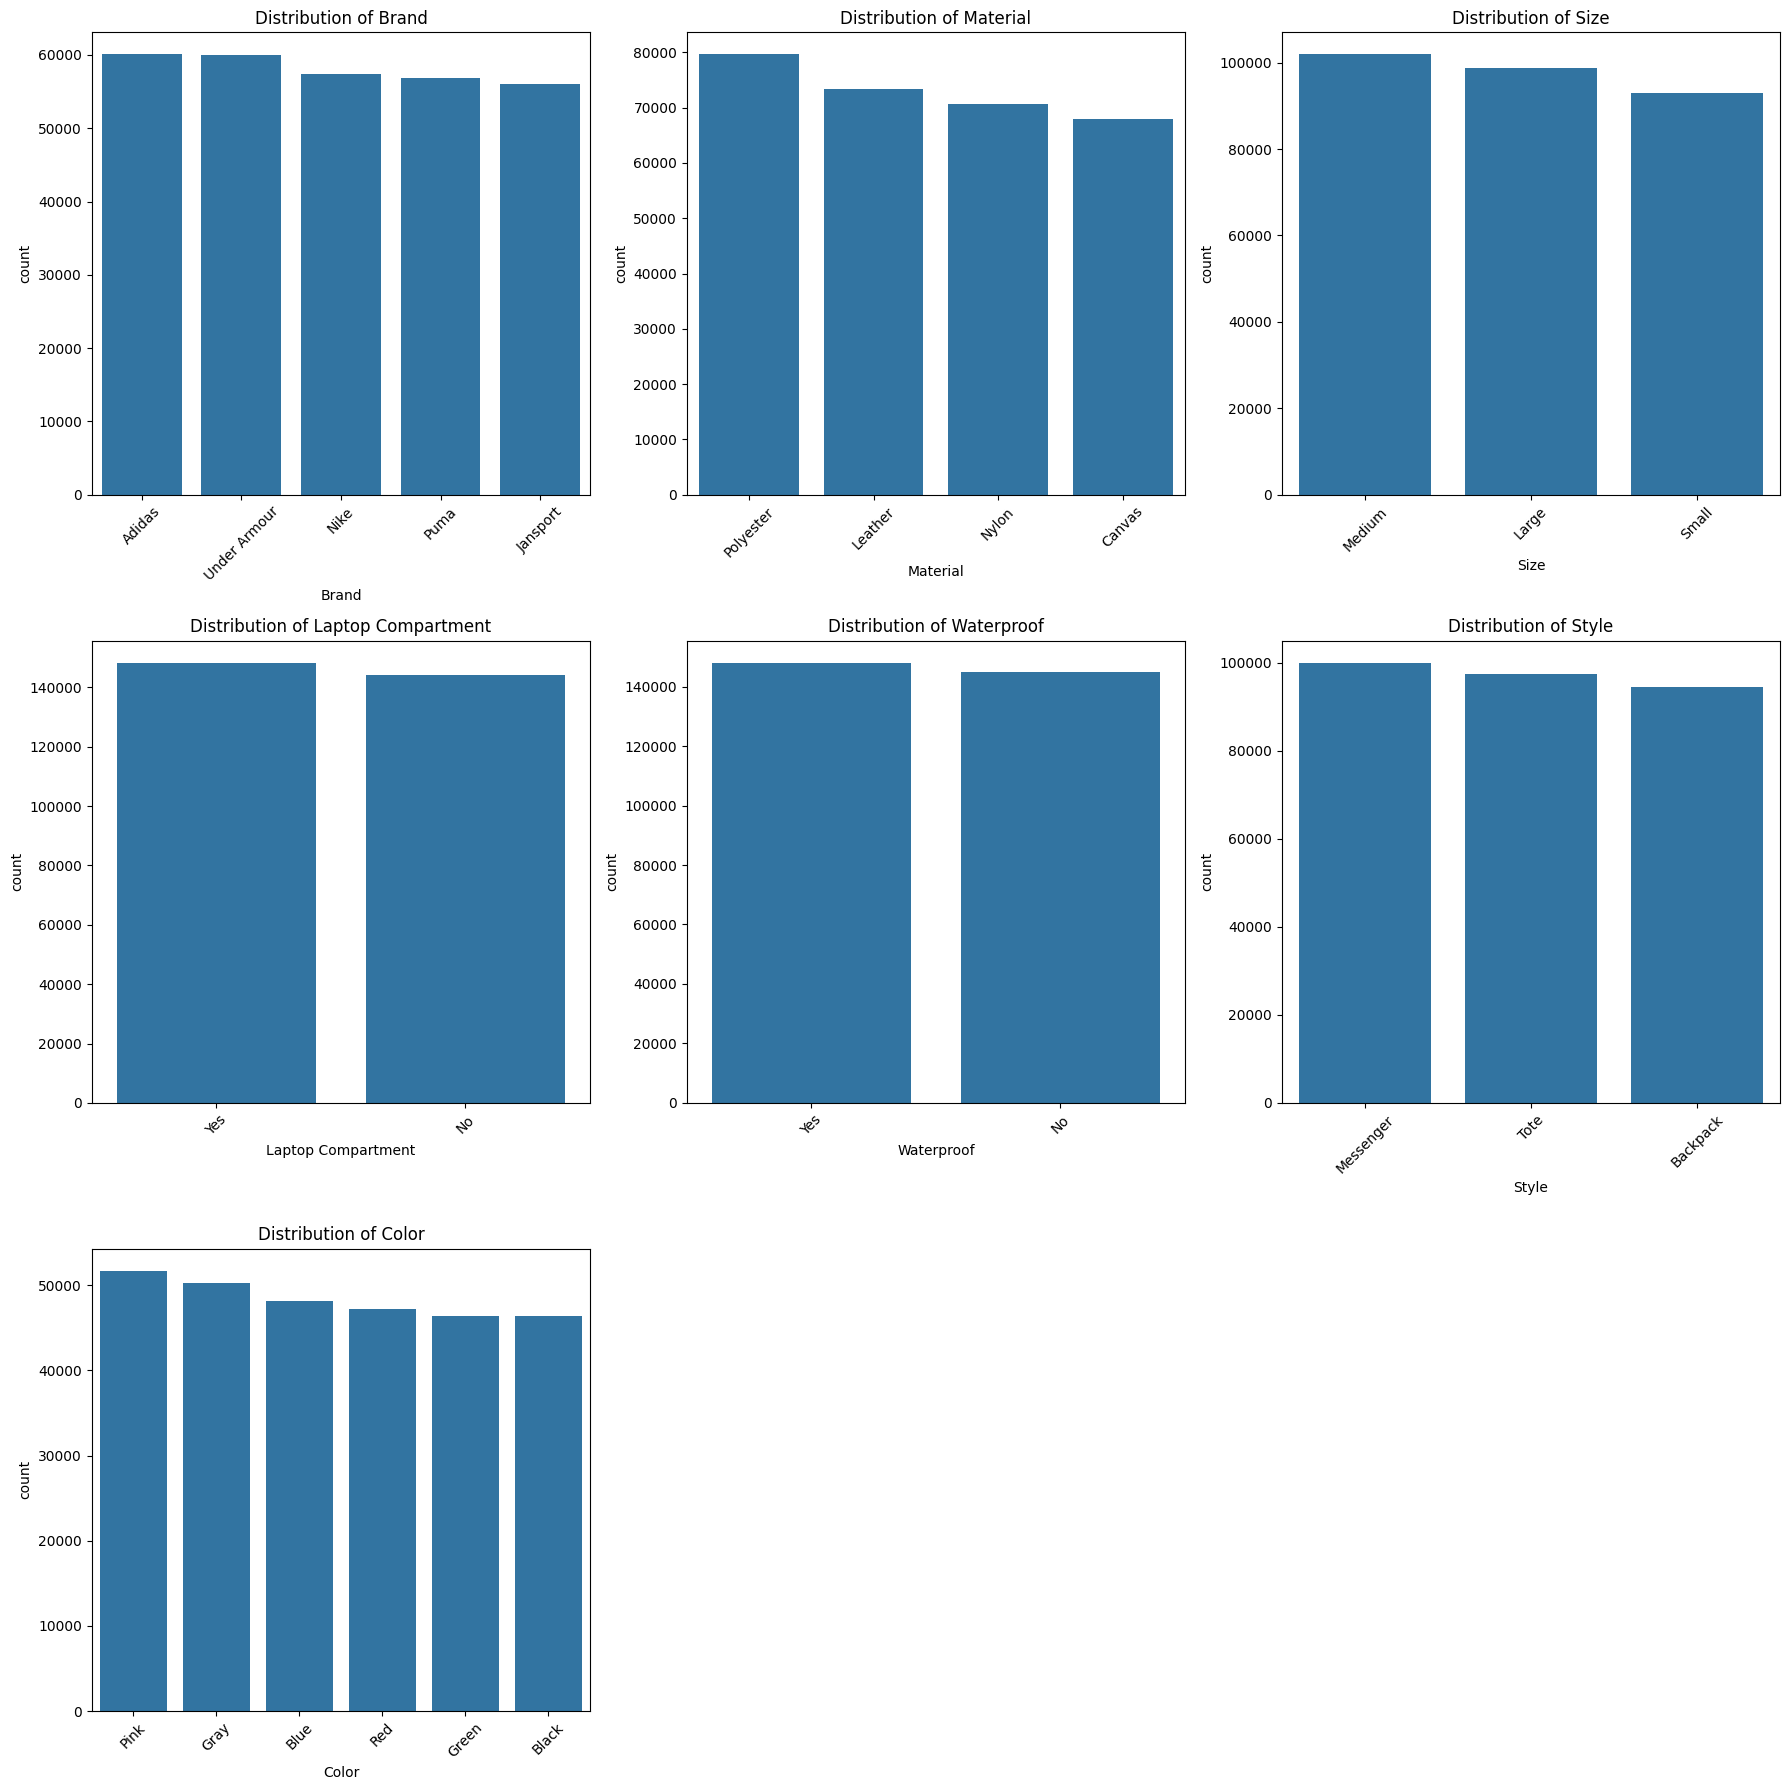

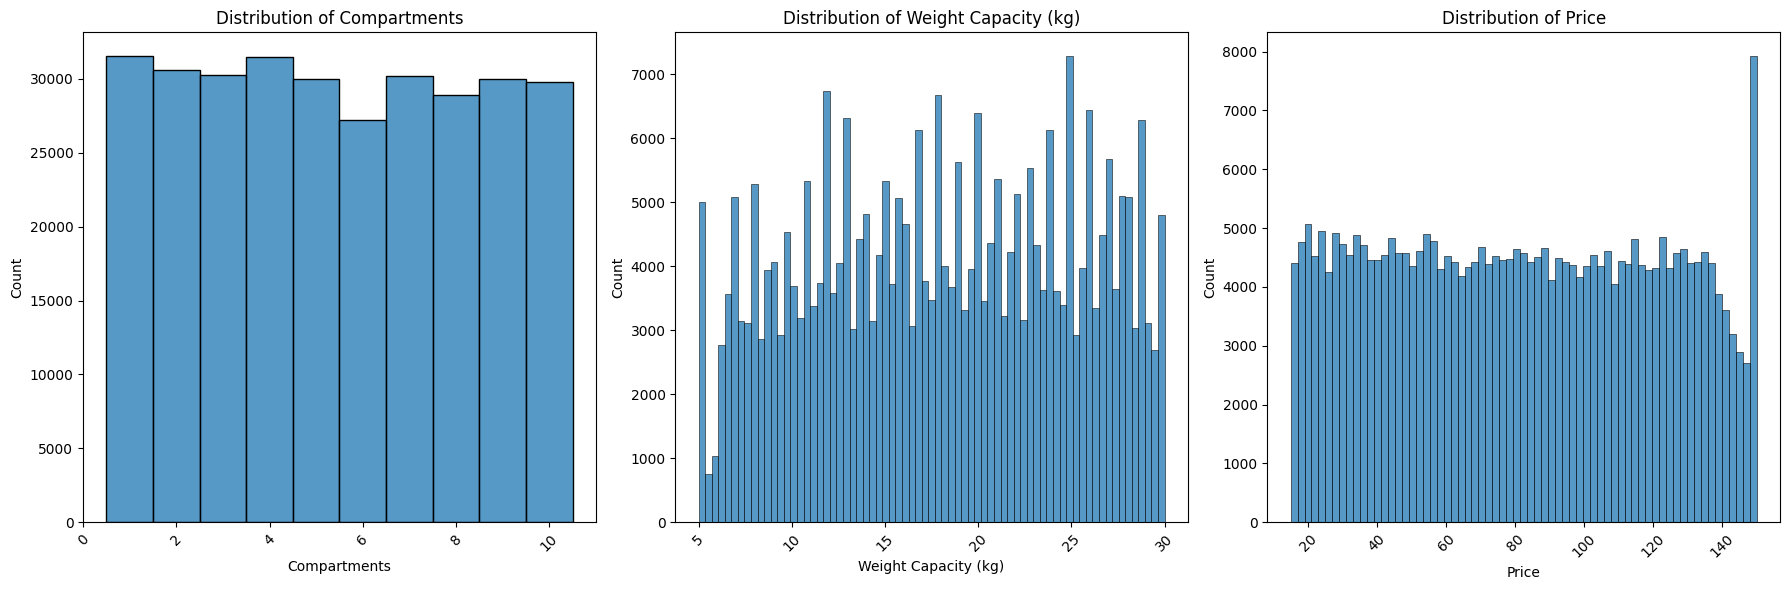

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numerical_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']

FIGURE_WIDTH = 18
PLOTS_PER_ROW = 3

def plot_categorical_columns(df):
    num_columns = len(categorical_columns)
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i])
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_numeric_columns(df):
    num_columns = len(numerical_columns)
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.histplot(df[column], ax=axes[i], discrete=column == 'Compartments')
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_columns(data)
plot_numeric_columns(data)

We can also visualize below the statistical summary of the numerical features, to complement the charts generated previously. As we can see, from the quantile data, all of the columns seem to be very well distributed, ensuring us that the data is symmetric and has no significant outliers, which will simplify its processing.

In [8]:
data.drop('id', axis=1).describe().T

count       mean        std   min        25%  \
Compartments          300000.0   5.443590   2.890766   1.0   3.000000   
Weight Capacity (kg)  299862.0  18.029994   6.966914   5.0  12.097867   
Price                 300000.0  81.411107  39.039340  15.0  47.384620   

                            50%         75%    max  
Compartments           5.000000    8.000000   10.0  
Weight Capacity (kg)  18.068614   24.002375   30.0  
Price                 80.956120  115.018160  150.0

### 🔗 Data Correlation

The correlation analysis revealed that no strong linear relationships appear to exist between the columns that could influence the target variable and, consequently, the model training.

As it can be seen both from the Categorical vs. Categorical countplots, there are no major correlations between different categorical features of the dataset.

A similar conclusion can be taken from the correlation heatmap of the numeric columns, which shows us that the weight capacity and the number of compartments have a correlation of only 0.003.

Therefore, the dataset does appear to have **no redundant attributes**, which will also lead to a simpler processing of the data.

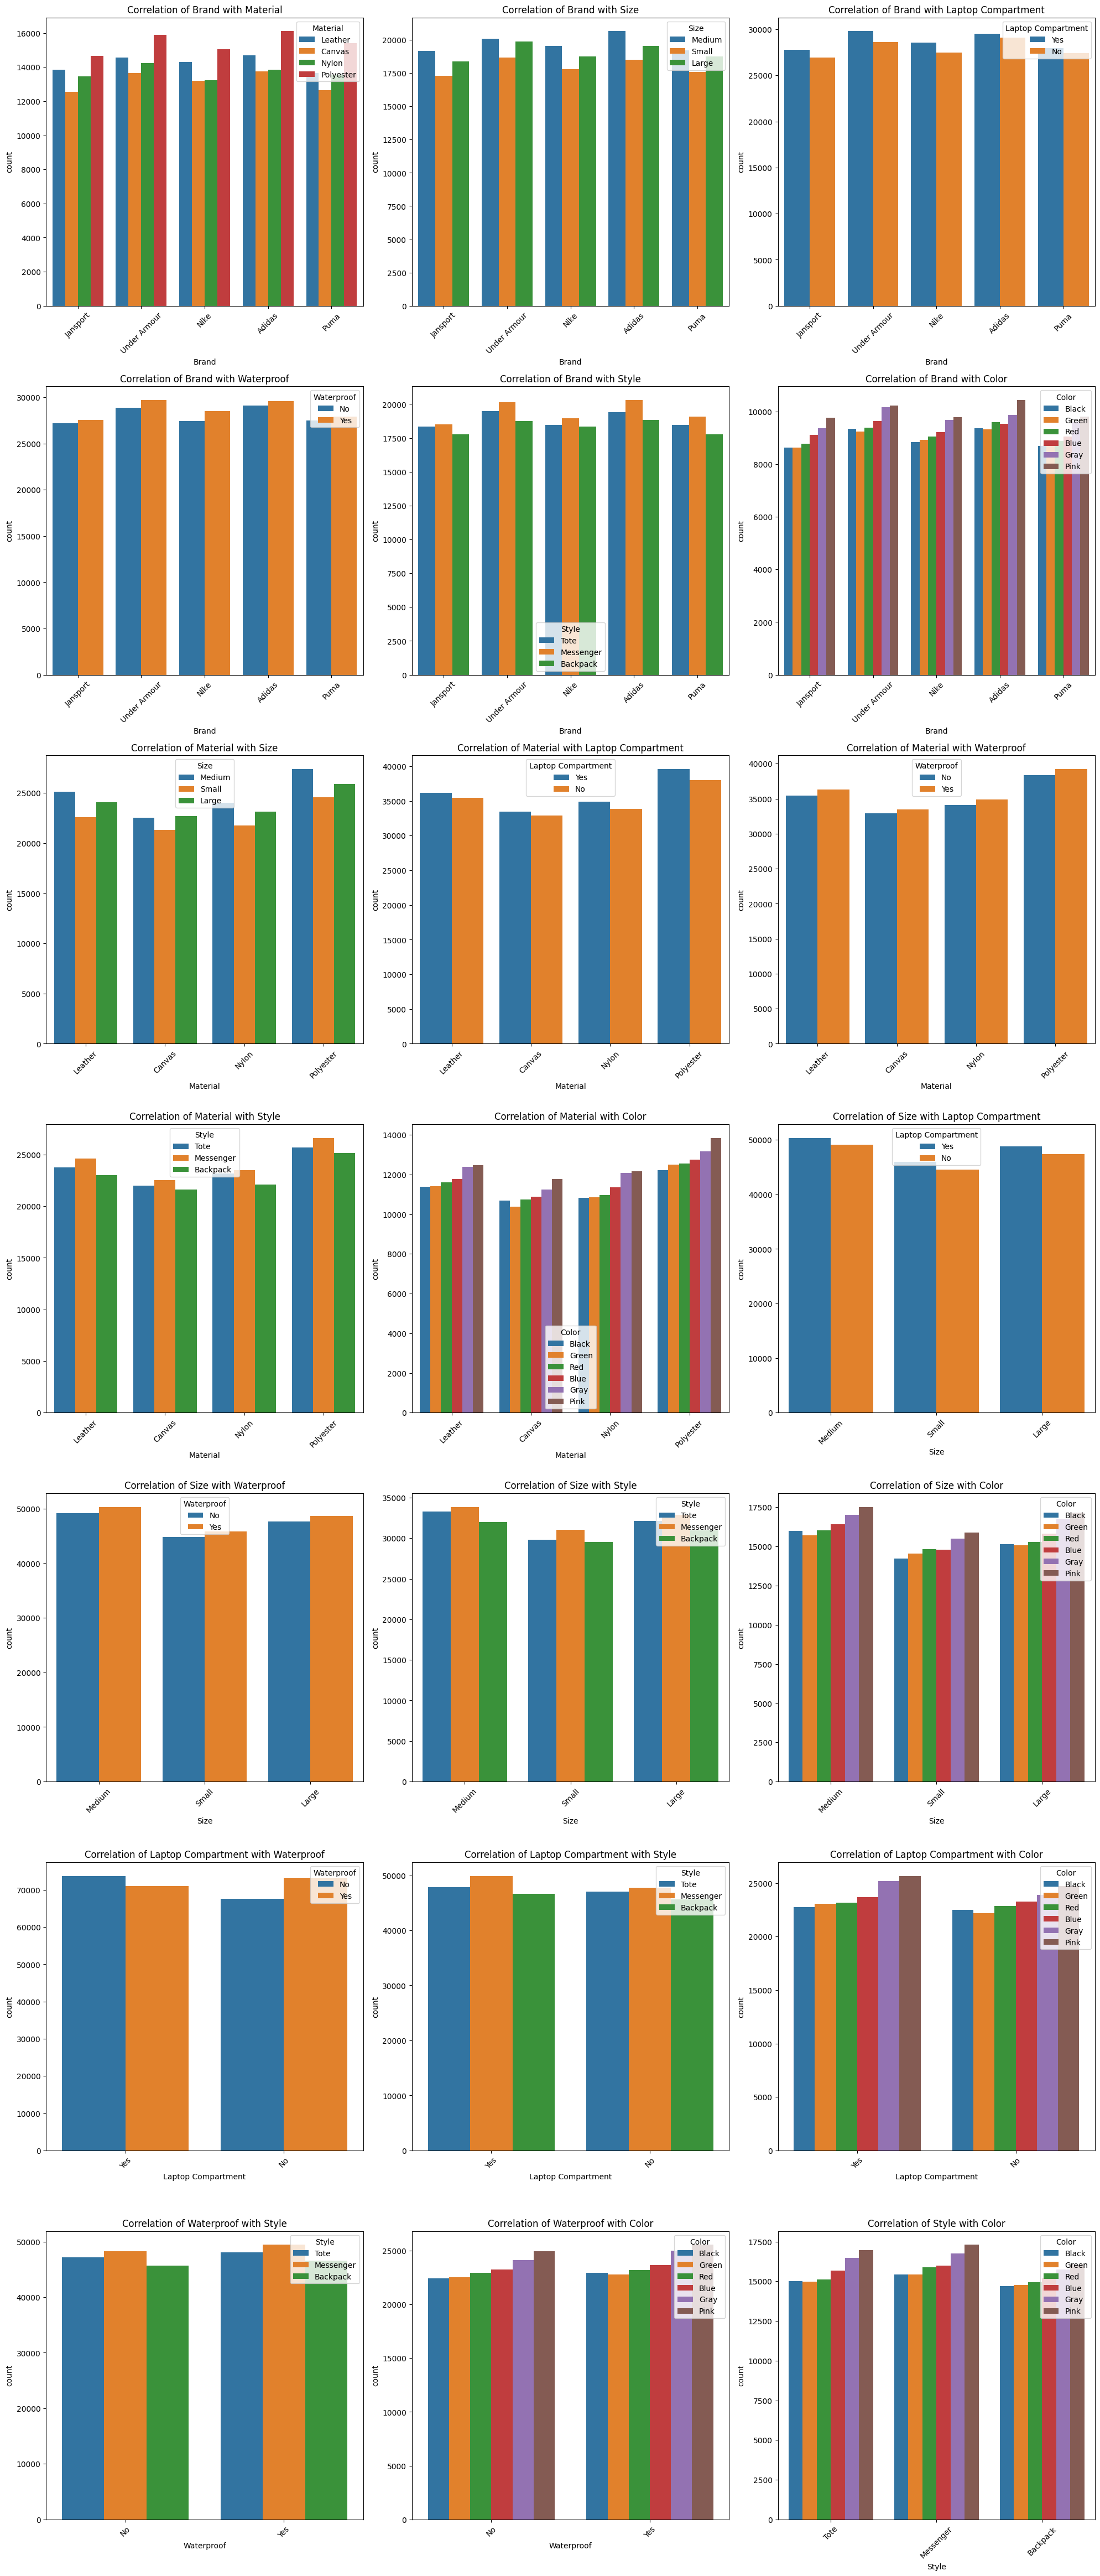

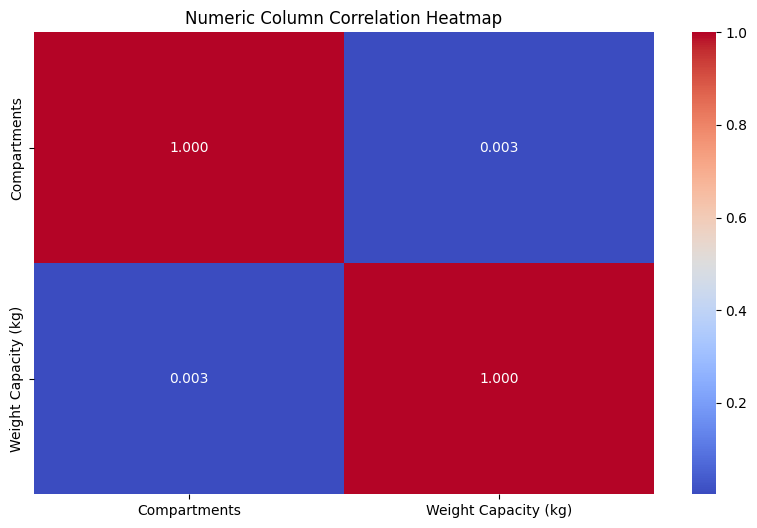

In [9]:
FIGURE_WIDTH = 20
PLOTS_PER_ROW = 3

def plot_categorical_corr(df):
    num_columns = (len(categorical_columns) * (len(categorical_columns) - 1)) // 2
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    plot_idx = 0
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            sns.countplot(x=categorical_columns[i], hue=categorical_columns[j], data=data, ax=axes[plot_idx])
            axes[plot_idx].set_title(f"Correlation of {categorical_columns[i]} with {categorical_columns[j]}")
            axes[plot_idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
            plot_idx += 1

    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_numeric_corr(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[[col for col in numerical_columns if col != 'Price']].corr(), annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
    plt.title(f"Numeric Column Correlation Heatmap")
    plt.show()

plot_categorical_corr(data)
plot_numeric_corr(data)

---

## 🧹 Data Preprocessing

### 🧩 Data Imputation

As seen in the previous section, the training datasets contains missing values in most of the columns. If we want to preserve all the rows, for example, for predicting the prices of the test dataset, we can deal with the missing data by applying **data imputation**, using the following methods:

- For **categorical features**: we will use the **mode** of the values, because it preserves the most common category without introducing new values.
- For **numeric features**: we will use the **median** of the values, because it is the statistic that better represents the individual values in a population. It is a reliable (better than using the mean) measure of the central tendency, reducing the influence of possible outliers or anomalies.

Nonetheless, since we will not be using all of the data in the model evaluation to speed up the algorithms, and considering that only 17.8% of the rows has missing values, for a better quality of the training dataset, we will **drop** all those rows with less values for the model evaluation.

In [10]:
def handle_missing(df, inpute=False):
    if inpute:
        for col in categorical_columns:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].mode()[0])
        for col in numerical_columns:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].median())
    else:
        df.dropna(inplace=True)

handle_missing(data)

### 🏷️ Data Encoding

Most of the models do not support processing data as strings, which are the values of categorical columns. To facilitate the modelling step, categorical features must also be encoded into numeric features that the machine learning algorithms can use. For the data encoding we used the following methods:

- **Binary Mapping**: This encoding consists of, for each value of a column, creating a new boolean column, with 1 for each row with that value in the original column and 0 otherwise. This is the most ideal encoding for most of the categorical features, since it prevents creating an implicit order on unorderable ranges. However, we have to keep in mind that this approach increases the dimensionality of the data significantly. For "Laptop Compartment" and "Waterproof" column, we map the boolean values into integers (1 for Yes and 0 for No), preventing the need for a new column.
- **Ordinal Mapping**: Since the "Size" column is ordinal ("Small" < "Medium" < "Large"), we manually map the existing categories into numbers between 0 and 1, preserving its order.

All of the new columns have slightly different names to be distinguishable from the existing ones.

In [11]:
def encode_data(df):
    global new_columns
    new_columns = []

    cat_columns_to_encode = [col for col in categorical_columns if col not in ['Size', 'Laptop Compartment', 'Waterproof']]

    for col in cat_columns_to_encode:
        encoded_col = pd.get_dummies(df[col], prefix=col).astype(int)
        for new_col in encoded_col.columns:
            df[new_col] = encoded_col[new_col]
        new_columns.extend(encoded_col.columns)

    df['Size_Ratio'] = df['Size'].map({'Small': 0, 'Medium': 0.5, 'Large': 1})
    df['Has_Laptop_Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Is_Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})

    new_columns.extend(['Size_Ratio', 'Has_Laptop_Compartment', 'Is_Waterproof'])

encode_data(data)

### ⚖️ Data Normalization

A final step of the data preprocessing is the normalization of the numerical features to ensure that these columns have a comparable scale. In our dataset, this is the case for the "Weight Capacity (kg)" and "Compartments, which are converted into "Weight_Capacity_Ratio" and "Compartments_Ratio", respectivelly. This ratio was obtained by feeding the values into a `MinMaxScaler`, placing all the values in a range from 0 to 1.

This reduces the risk of values of larger magnitude disproportionately influencing the models, while preserving the distribution and relative values of the data.

In [12]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    global new_columns

    scaler = MinMaxScaler()
    df['Compartments_Ratio'] = scaler.fit_transform(df[['Compartments']])
    df['Weight_Capacity_Ratio'] = scaler.fit_transform(df[['Weight Capacity (kg)']])

    new_columns += [col for col in ['Compartments_Ratio', 'Weight_Capacity_Ratio'] if col not in new_columns]

normalize_data(data)

### 🎯 Target Definition

To conclude the data preprocessing, we will also define final columns of the dataset, that will be used to train the models, to be the new columns added, since they encode all the relevant original features, and we define the target variable as the "Price" column, as is.

The shape of the final training dataset can also be seen below. It has a total of **23 columns** and **almost 250 thousand rows**. A dimensionality of 23 is perfectly reasonable for a machine learning problem as ours and, as we concluded in the data imputation phase, we still continue with a lot of data rows after removing the rows with missing data.

In [13]:
final_columns = new_columns

X = data[final_columns]
y = data['Price']

print("Training data")
print(X.head())

print("Testing data")
print(y.head())

print("Training data shape")
print(X.shape)

Training data
   Brand_Adidas  Brand_Jansport  Brand_Nike  Brand_Puma  Brand_Under Armour  \
0             0               1           0           0                   0   
1             0               1           0           0                   0   
2             0               0           0           0                   1   
3             0               0           1           0                   0   
4             1               0           0           0                   0   

   Material_Canvas  Material_Leather  Material_Nylon  Material_Polyester  \
0                0                 1               0                   0   
1                1                 0               0                   0   
2                0                 1               0                   0   
3                0                 0               1                   0   
4                1                 0               0                   0   

   Style_Backpack  ...  Color_Blue  Color_Gray  Color_

___

## 🛠️ Model Building

### 🎛️ Parameter Tuning

Before moving on to the models themselves, it's important to set up the function that will determine the best parameters for a specific model for the given problem.

For this, we used **Grid Search with K-Fold Cross Validation** to find the best parameters that reduce the prediction error.  
Based on the original challenge, we also used the **negative mean squared error** as the **scoring metric**.

Since this step can take a long time, since the model will be trained with each combination of parameters, we made sure to use a relativelly low value for the number of splits in the cross validation (5) and also set up the number of parallel jobs to be unlimited, with the help of a parallel backend.

In [14]:
from sklearn.model_selection import GridSearchCV, KFold
from joblib import parallel_backend

def tune_params(model, param_grid, X, y, cv=5):
    cv = KFold(n_splits=cv, shuffle=True, random_state=1)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    with parallel_backend('multiprocessing'):
        grid_search.fit(X, y)

    print(f"Best parameters:")
    for param_name, param_value in grid_search.best_params_.items():
        print(f"  {param_name}: {param_value}")

    return grid_search.best_params_

### 📑 Model Evaluation

In order to evaluate the performance of the models, K-Fold Cross Validation will also be used. For each train-test fold, the following metrics are used for analysis:

- **Mean Squared Error**: average square difference between predicted and actual value
- **Root Mean Squared Error**: more interpretable scale of previous metric
- **Mean Absolute Error**: average of the absolute difference between predicted and actual value
- **R² Score**: proportion of variance in the target variable explained by the model (remaining is noise or unexplained variance)

Additionally, the total **training time** and **testing time** are also measured and used for comparison.

In [15]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []
models = {}
residuals = {}

def evaluate_regressor(model, X, y, cv=10, predict=False):
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)

    mse_scores = []
    mae_scores = []
    r2_scores = []
    training_times = []
    testing_times = []

    all_y_train = []
    all_y_pred = []

    def train_and_evaluate(train_idx, test_idx):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        training_times.append(end_train - start_train)

        start_test = time.time()
        y_pred = model.predict(X_test)
        end_test = time.time()
        testing_times.append(end_test - start_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

        if predict:
            all_y_train.extend(y_test.tolist())
            all_y_pred.extend(y_pred.tolist())

        print(f"Trained model in {training_times[-1]:.4f} seconds and tested in {testing_times[-1]:.4f} seconds.")

    for train_idx, test_idx in kf.split(X, y):
        train_and_evaluate(train_idx, test_idx)

    results = {
        'MSE': np.mean(mse_scores),
        'RMSE': np.sqrt(np.mean(mse_scores)),
        'MAE': np.mean(mae_scores),
        'R-squared': np.mean(r2_scores),
        'Train Time': np.mean(training_times),
        'Test Time': np.mean(testing_times)
    }

    return results, all_y_train, all_y_pred

def print_results(results):
    print(f"Avg Mean Squared Error (MSE): {results['MSE']:.4f}")
    print(f"Avg Root Mean Squared Error (RMSE): {results['RMSE']:.4f}")
    print(f"Avg Mean Absolute Error (MAE): {results['MAE']:.4f}")
    print(f"Avg R² Score: {results['R-squared']:.4f}")
    print(f"Avg Training Time: {results['Train Time']:.4f} seconds")
    print(f"Avg Testing Time: {results['Test Time']:.4f} seconds")

def tune_and_eval(model, param_grid, X, y, return_residuals=False, tune_cv=5, eval_cv=10):
    print(f"Tuning parameters for {model.__class__.__name__}...")
    best_params = tune_params(model, param_grid, X, y, cv=tune_cv)
    model.set_params(**best_params)

    print()
    print(f"Evaluating {model.__class__.__name__} with best parameters...")
    res, y_train, y_test = evaluate_regressor(model, X, y, cv=eval_cv, predict=return_residuals)
    print_results(res)
    return res, y_train, y_test

### Sample Creation

The following cell is used to create a smaller sample of the training dataset. Since the original dataset has a total of 300 000 rows, with the processed dataset following not much behind, many of the algorithms (specially the Support-Vector Machines) can take *a lot* of time.

Considering this, we will be evaluating the models with one sixth of the original dataset size. From what we've seen when training with more data, the conclusions almost do not differ when increasing the dataset size past this point.

In [16]:
X_sample = X.sample(n=50000, random_state=1)
y_sample = y.loc[X_sample.index]

### 🌲 Decision Tree Regressor

The first regressor that will be testing is based on a **decision tree**. A decision tree is a type of machine learning model that makes decisions by asking a series of yes/no questions about the input features, in a tree-like structure, which also resemples a flow-chart. Each node in the tree represents a decision based on a feature, and each branch represents the outcome of that decision. Eventually, the path ends at a leaf node, which gives the predicted value, for a regression model.

For this model, we will be tuning the following parameters:
- `criterion`: Defines how to measure the quality of a split
- `min_samples_split`: Minimum number of samples required to split a node
- `min_samples_leaf`: Minimum number of samples required at a leaf node
- `max_features`: Defines the maximum number of features to use when getting the best split
- `max_depth`: the maximum depth of the generated tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 7, 10],
}

result, y_train, y_test = tune_and_eval(model, param_grid, X_sample, y_sample, return_residuals=True)
models['Decision Tree'] = model
result['Model'] = 'Decision Tree'
results.append(result)
residuals['Decision Tree'] = (y_train, y_test)

Tuning parameters for DecisionTreeRegressor...
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] EN

The decision tree is a very simple model, which, as we see from the results, trains in a very short amount of time. Almost all the best parameters can be reasoned well, since they are directly the ones that give the best performances: the criterion used is `squared_error`, since it is also the measure used to evaluate the model, smaller `min_samples_split` and `min_sample_leaf` values and higher `max_feature` values also give better results. The only surprising thing is the optimal `max_depth` being 1. This means that further increasing the max depth leads to **overfitting**, which we can interpret as the input data having relativelly weak patterns with the price value. We can also visualize the tree below:

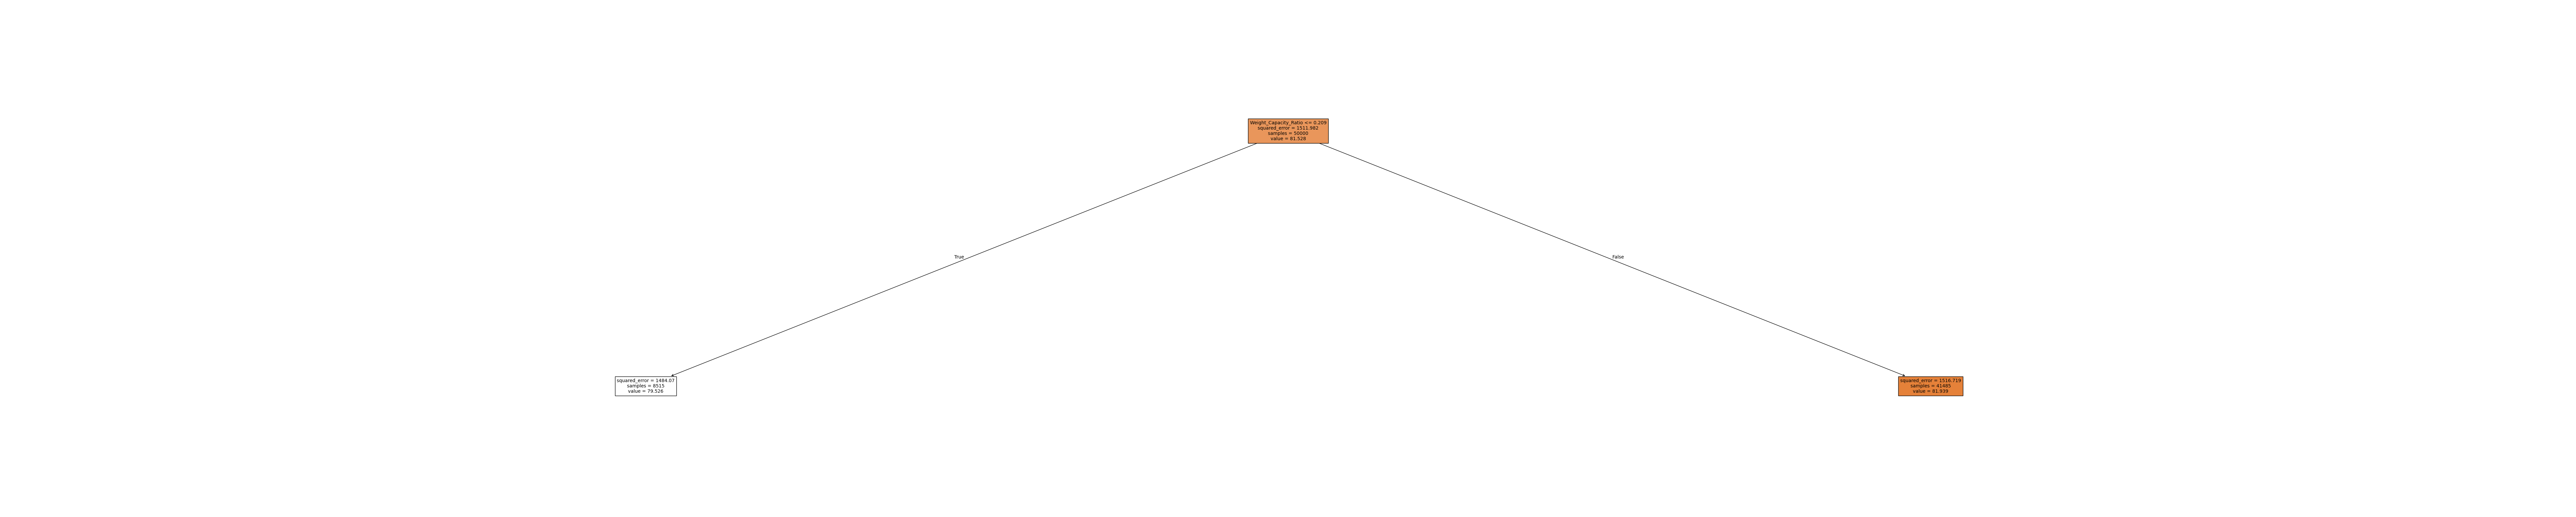

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(random_state=1, criterion='squared_error', max_depth=1, min_samples_split=2, min_samples_leaf=1, max_features=None)
model.fit(X_sample, y_sample)

plt.figure(figsize=(100, 20))

_ = plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)

The only feature that the tree uses is the `Weight_Capacity_Ratio`, but it is only used to change only slightly the predicted value, as we also observe the leaf values are very close. This foreshadows one of our conclusion, that the dataset features are relatively irrelevant for the prediction of the backpack value.

### 🏘️ K-Nearest Neighbors (KNN)

The next model with be based in **K-nearest neighbors**. This algorithm is also very simple: it predicts conclusions by looking at the K closest data points in the dataset (its neighbors) and using its values, often performing an average in regression environments.

For this model, we will vary:
- `n_neighbors`: The number of neighbors (i.e. the K value)
- `weights`: Characterizes how the predicted mean is calculated (`uniform` makes an arithmetic average, while `distance` makes a weighed average using the distance`)
- `p`: Defines the type of distance to use

In [19]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [50, 100, 200, 500, 1000, 2000],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 -> manhattan; 2 -> euclidean
}

result, y_train, y_test = tune_and_eval(model, param_grid, X_sample, y_sample, return_residuals=True)
models['K Nearest Neighbors'] = model
result['Model'] = 'K Nearest Neighbors'
results.append(result)
residuals['K Nearest Neighbors'] = (y_train, y_test)

Tuning parameters for KNeighborsRegressor...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...............n_neighbors=50, p=2, weights=uniform; total time=  26.2s
[CV] END ...............n_neighbors=50, p=2, weights=uniform; total time=  27.2s
[CV] END ...............n_neighbors=50, p=2, weights=uniform; total time=  28.5s
[CV] END ...............n_neighbors=50, p=1, weights=uniform; total time=  33.7s
[CV] END ...............n_neighbors=50, p=2, weights=uniform; total time=  30.0s
[CV] END ...............n_neighbors=50, p=2, weights=uniform; total time=  30.1s
[CV] END ..............n_neighbors=50, p=2, weights=distance; total time=  30.1s
[CV] END ..............n_neighbors=50, p=2, weights=distance; total time=  29.8s
[CV] END ...............n_neighbors=50, p=1, weights=uniform; total time=  36.3s
[CV] END ...............n_neighbors=50, p=1, weights=uniform; total time=  37.5s[CV] END ...............n_neighbors=50, p=1, weights=uniform; total time=  37.6s

[C

Seing the best parameters, it's not very surprising seeing that the maximum neighbor size is used, since it usually better performances are achieved using more neighbors. We can also see that the best distance measure is the Manhattan distance, and the best averaging metric is the standard arithmetic mean.

### ➡️ Support Vector Machines (SVM)

Now we will be moving to **Support Vector Machines**. It is a more advanced machine learning model that works by finding the best boundary - a **hyperplane** - that separates data with the maximum possible margin.

For this one, we will be varying the following parameters:
- `kernel`: Since SVMs typically work in the linear space, it defines how the input data is mapped to a hight-dimensional space, to improve the separation - `linear` makes no transformations, which is good for linear data, and `rbf` is a common kernel with handles non-linearity well -
- `C`: Regularization parameter, which controls the trade-off between a smooth decision boundary and correctly prediction values (the lower, the simpler the boundary will be)
- `epsilon`: Defines the margin of tolerance around the predicted value, since small differences are ignored (the lower, the more complex will be)

In [20]:
from sklearn.svm import SVR

model = SVR();
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.01, 0.1, 1],
    'epsilon': [0.05, 0.1, 0.3]
}

result, y_train, y_test = tune_and_eval(model, param_grid, X_sample, y_sample, return_residuals=True)
models['Support Vector Machines'] = model
result['Model'] = 'Support Vector Machines'
results.append(result)
residuals['Support Vector Machines'] = (y_train, y_test)

Tuning parameters for SVR...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ................C=0.01, epsilon=0.05, kernel=linear; total time= 4.5min
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time= 4.5min
[CV] END ................C=0.01, epsilon=0.05, kernel=linear; total time= 4.5min
[CV] END ................C=0.01, epsilon=0.05, kernel=linear; total time= 4.5min
[CV] END ................C=0.01, epsilon=0.05, kernel=linear; total time= 4.6min
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time= 4.6min
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time= 4.6min
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time= 4.6min
[CV] END ................C=0.01, epsilon=0.05, kernel=linear; total time= 4.7min
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time= 4.6min
[CV] END ...................C=0.01, epsilon=0.05, kernel=rbf; total time= 4.9min
[CV] END ..........

The best parameters ended up being the smallest `C` and `epsilon` values, as well as the linear kernel, suggesting that our data has good linearity.

### 🧠 Neural Networks

We will also measure the performance of **Neural Networks** in this dataset. A neural network is a machine learning model inspired by the human brain, consisting of a layer of **neurons** (nodes) that process data in stages. It has an input, output and hidden layers, which can add complexity to the model. Each neuron is connected to many outputs of the previous layer, applying a weighed sum on the inputs. This way, the model can encounter complex, nonlinear relationships in the given data.

In specific we will be using an **Multilayer Perceptron** model, which is often considered the most simple form of neural networks. One of its particularities is that each neuron connects directly to every neuron in the next layer, giving a layered fully-connected graph.

We will be varying the foolowing parameters:
- `hidden_layer_sizes`: Specifies the structure of the hidden layers
- `activation`: The activation function applied to each layer
- `solver`: The algorithm used to optimize the weights
- `alpha`: Regularization term (used to prevent overfitting by penalizing large weights)
- `learning_rate`: Controls how the learning rate evolves during training

In [21]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=1, early_stopping=True)
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 5), (50,), (100,), (50, 50), (64, 32, 8), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['adaptive'],
}

result, y_train, y_test = tune_and_eval(model, param_grid, X_sample, y_sample, return_residuals=True)
models['Neural Network'] = model
result['Model'] = 'Neural Network'
results.append(result)
residuals['Neural Network'] = (y_train, y_test)

Tuning parameters for MLPRegressor...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   8.4s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=  10.3s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=  11.9s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=  11.8s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=  11.7s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=  14.2s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=  13.1s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_

Much like before, there is nothing very important to point out, other than the fact that the best hidden layer configuration is the simplest (with only one layer with 10 neurons). Simpler hidden layers normally are used to prevent overfitting, and are common for simpler problems. This aligns with that we've seen for the decision trees, that many of the data correlations are not very strong.

### 🎲 Random Forests

To top it off, we will be testing a **Random Forests** model. This is an ensemble machine learning method, that combines many **decision trees**, as well as their results, to make better predictions, often using the average.

Many of the parameters are analogous to the ones of the decision trees, with the exception of `n_estimators`, the number of estimators/decision trees used.

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [20, 50, 100, 200, 500],
    'criterion': ['squared_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 7],
}

result, y_train, y_test = tune_and_eval(model, param_grid, X_sample, y_sample, return_residuals=True)
models['Random Forest'] = model
result['Model'] = 'Random Forest'
results.append(result)
residuals['Random Forest'] = (y_train, y_test)

Tuning parameters for RandomForestRegressor...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.4s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.4s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END criterion=squared_error, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=squared_erro

Unsurprisingly, the best performance was achieved with the maximum estimators. However, in contrast to the results obtained from the decision trees, the best `max_depth` was 5, instead of 1. This is normal, as the diversity and averaging done by the random forest reduces overfitting, allowing for deeper trees without overfitting data.

___

## 📊 Result Analysis

Before starting the result analysis, we will convert the measured results into a Pandas dataframe for better handling. All the metrics taken are also shown in a table format.

In [23]:
results = pd.DataFrame(results)
results.set_index('Model', inplace=True)

print(results)

                                 MSE       RMSE        MAE  R-squared  \
Model                                                                   
Decision Tree            1511.692054  38.880484  33.636276   0.000074   
K Nearest Neighbors      1511.679077  38.880317  33.636232   0.000081   
Support Vector Machines  1511.128194  38.873232  33.618823   0.000443   
Neural Network           1511.060358  38.872360  33.619075   0.000490   
Random Forest            1510.751821  38.868391  33.625798   0.000695   

                         Train Time  Test Time  
Model                                           
Decision Tree              0.023265   0.001782  
K Nearest Neighbors        0.004837   2.827673  
Support Vector Machines   67.456698   4.641250  
Neural Network             2.384443   0.004126  
Random Forest              2.988764   0.055240  


### 🤼🏼‍♂️ Metric Comparison

A set of bar charts is generated to visually compare the performance of each model across multiple metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R-squared (R²). These plots allow for a comparison of how well each model performed, with lower values indicating better performance for all metrics except R², where higher is better. 

In addition, a separate chart presents the training and testing time for each model on a logarithmic scale, making it easier to identify time-efficient models, thus helping predicting the performance with computational cost.

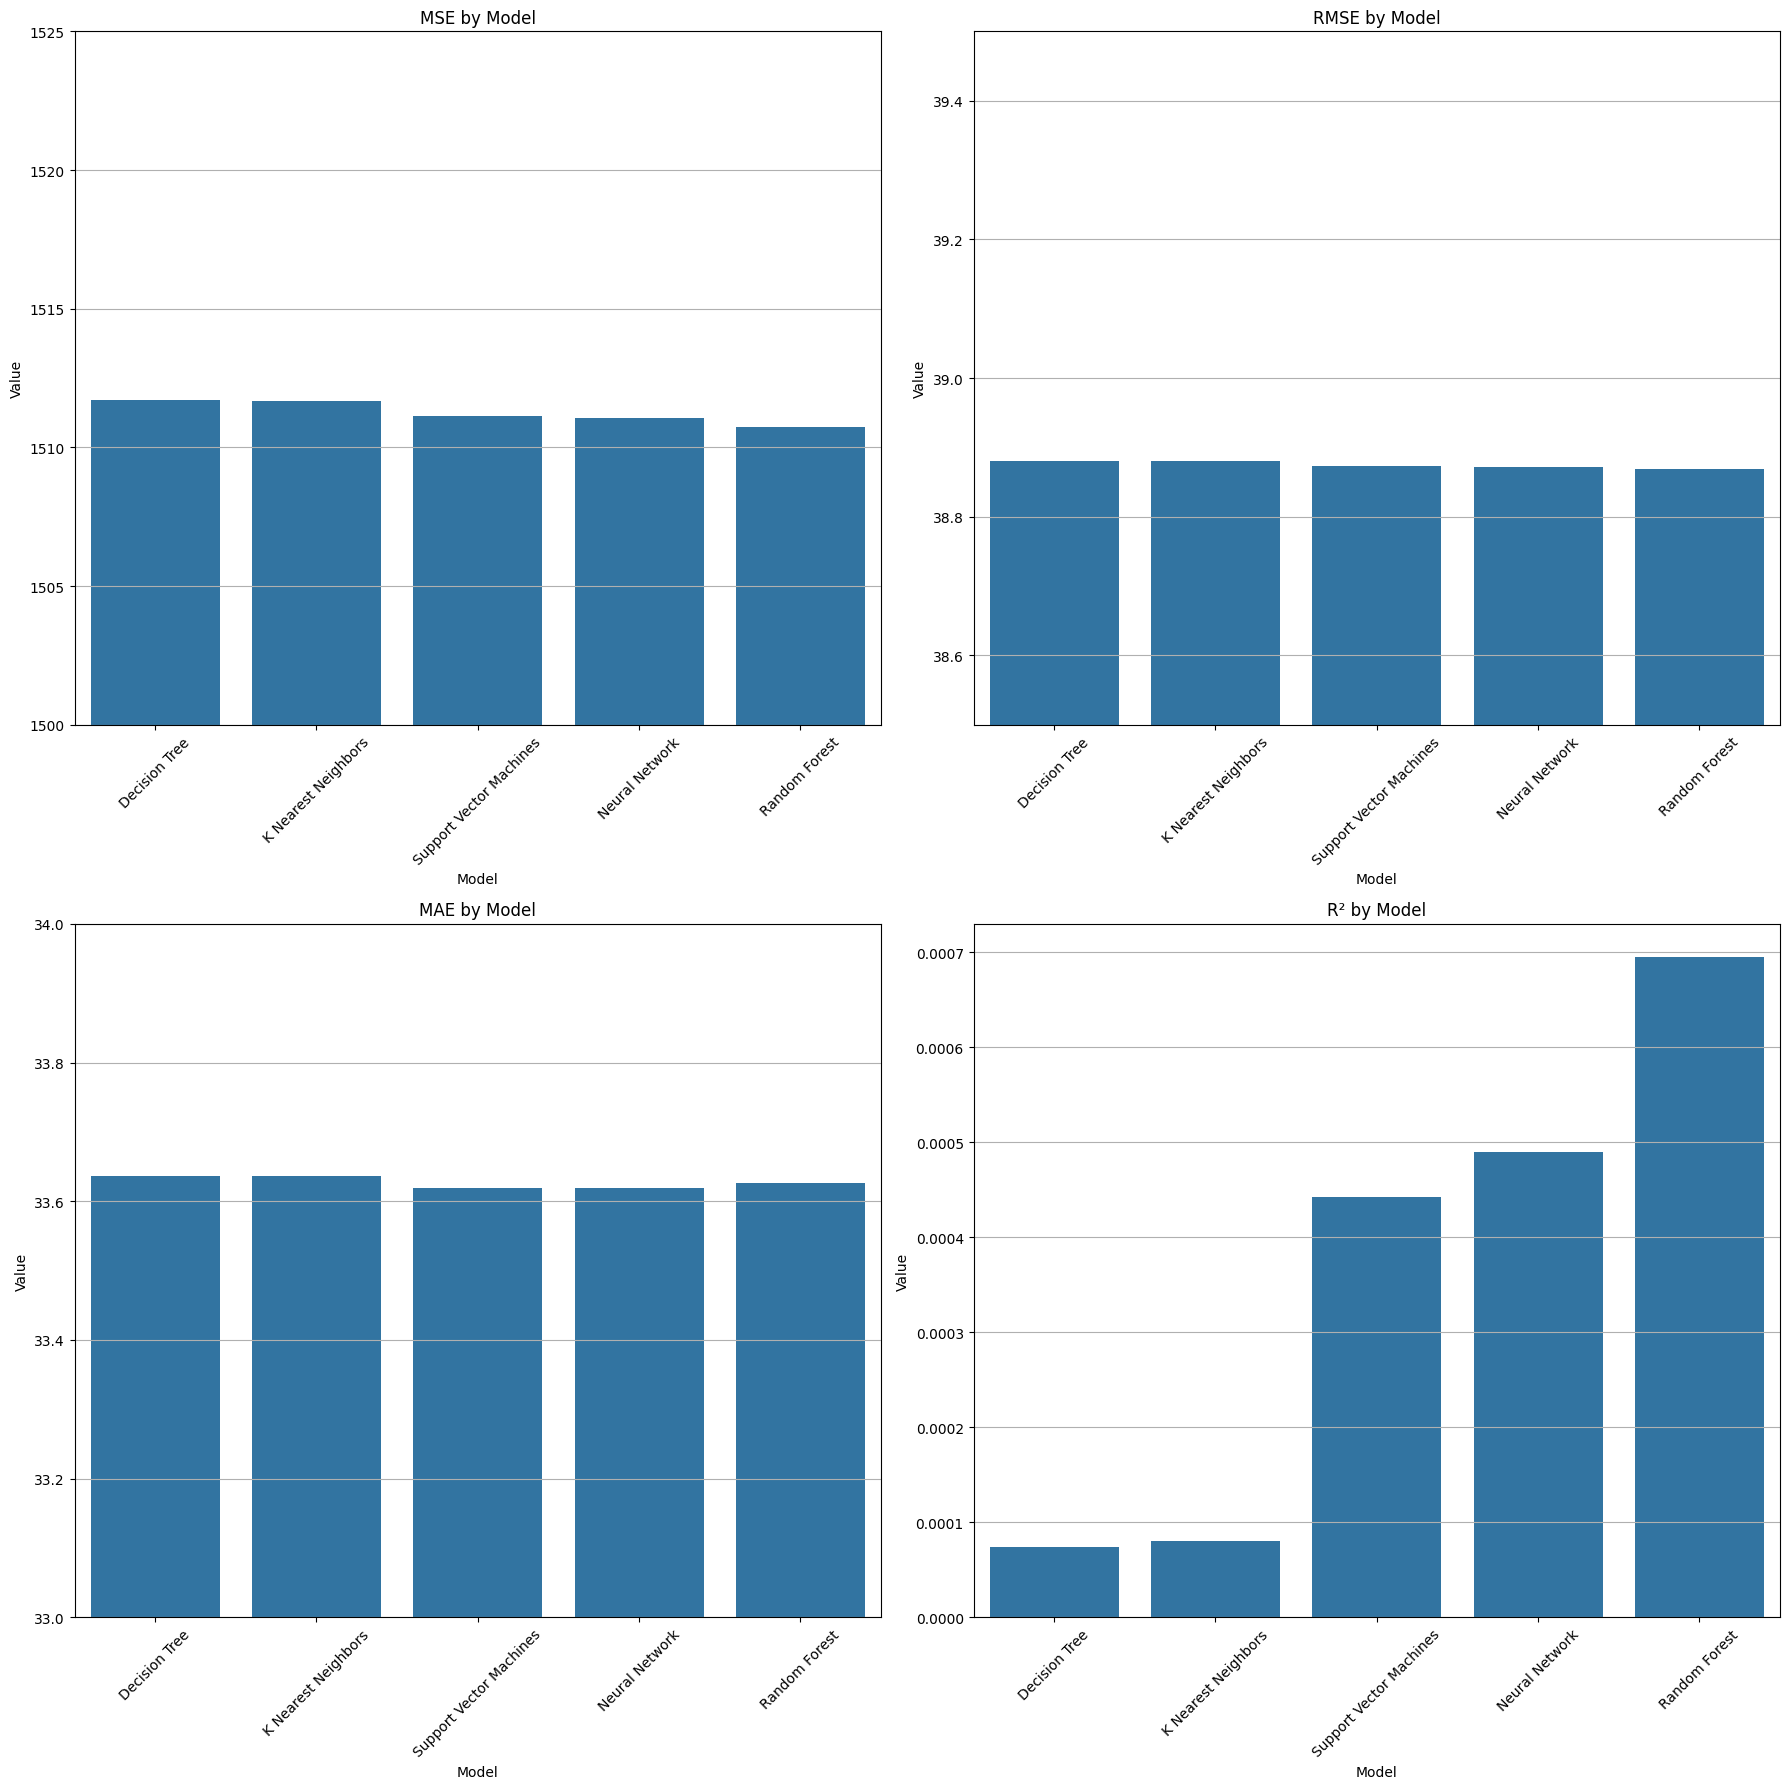

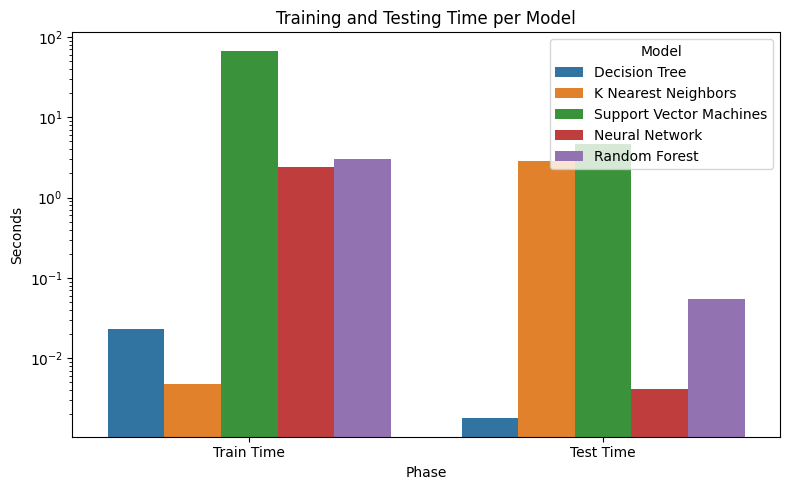

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Melt your DataFrame
plot_df = results.reset_index()
metrics_to_plot = ['MSE', 'RMSE', 'MAE', 'R-squared']
melted = plot_df.melt(id_vars='Model', value_vars=metrics_to_plot,
                      var_name='Metric', value_name='Value')

# Constants
FIGURE_WIDTH = 18
PLOTS_PER_ROW = 2
num_metrics = len(metrics_to_plot)
num_rows = math.ceil(num_metrics / PLOTS_PER_ROW)

# Subplots
fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW,
                         figsize=(FIGURE_WIDTH, (FIGURE_WIDTH / PLOTS_PER_ROW) * num_rows))
axes = axes.flatten()

# One subplot per metric
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(data=melted[melted['Metric'] == metric],
                x='Model', y='Value', ax=axes[i])
    axes[i].set_title(f'{metric if metric != 'R-squared' else 'R²'} by Model')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

    if metric == 'MSE':
        axes[i].set_ylim(1500, 1525)
    elif metric == 'RMSE':
        axes[i].set_ylim(38.5, 39.5)
    elif metric == 'MAE':
        axes[i].set_ylim(33, 34)


# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

timing = plot_df.melt(id_vars='Model', value_vars=['Train Time', 'Test Time'],
                      var_name='Phase', value_name='Time (s)')

plt.figure(figsize=(8, 5))
sns.barplot(data=timing, x='Phase', y='Time (s)', hue='Model')
plt.title("Training and Testing Time per Model")
plt.ylabel("Seconds")
plt.yscale('log')
plt.tight_layout()
plt.show()

Analyzing the bar plots for the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), we observe that the differences between models are subtle. Nonetheless, the ranking of models remains approximately consistent across all cases (in decreasing order): Decision Tree, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Neural Networks, and Random Forest.

As for the R² comparison by model, all of them are extremely poor, with values close to zero. Despite this, the same pattern from the previous metrics still emerges, placing the Random Forest as the best model among the ones trained. None of the models had an R² score below zero and compared 

For the time comparisons, we used a logarithmic scale to allow for better visualization of the values, since some models, especially the SVM, take very long to run when compared to the others. In terms of the Train vs. Testing times for each model, the values vary as expected given the computational complexities of the approaches used by each of them.

Overall, based on the combined metrics, we consider Neural Networks to be more adequate than SVM for this dataset not only because the obtained result is slightly better, but also since the former takes way less time to train and test. The results also show that Decision Tree and K-Nearest Neighbors are the most innacurate. The best approach from the implemented models is the Random Forest, consistently outperforming all of the others (even if it is by a small margin). 

### 📈 Actual vs Predicted Plots

A set of scatter plots is created to visualize the relationship between actual and predicted valeus for each model. These plots help visualizing how the model outputs align with the true target values.

Each plot corresponds to a different model and includes a dashed red reference line to indicate perfect predictions. Points that lie near this line represent accurate predictions, while larger deviations highlight prediction errors.

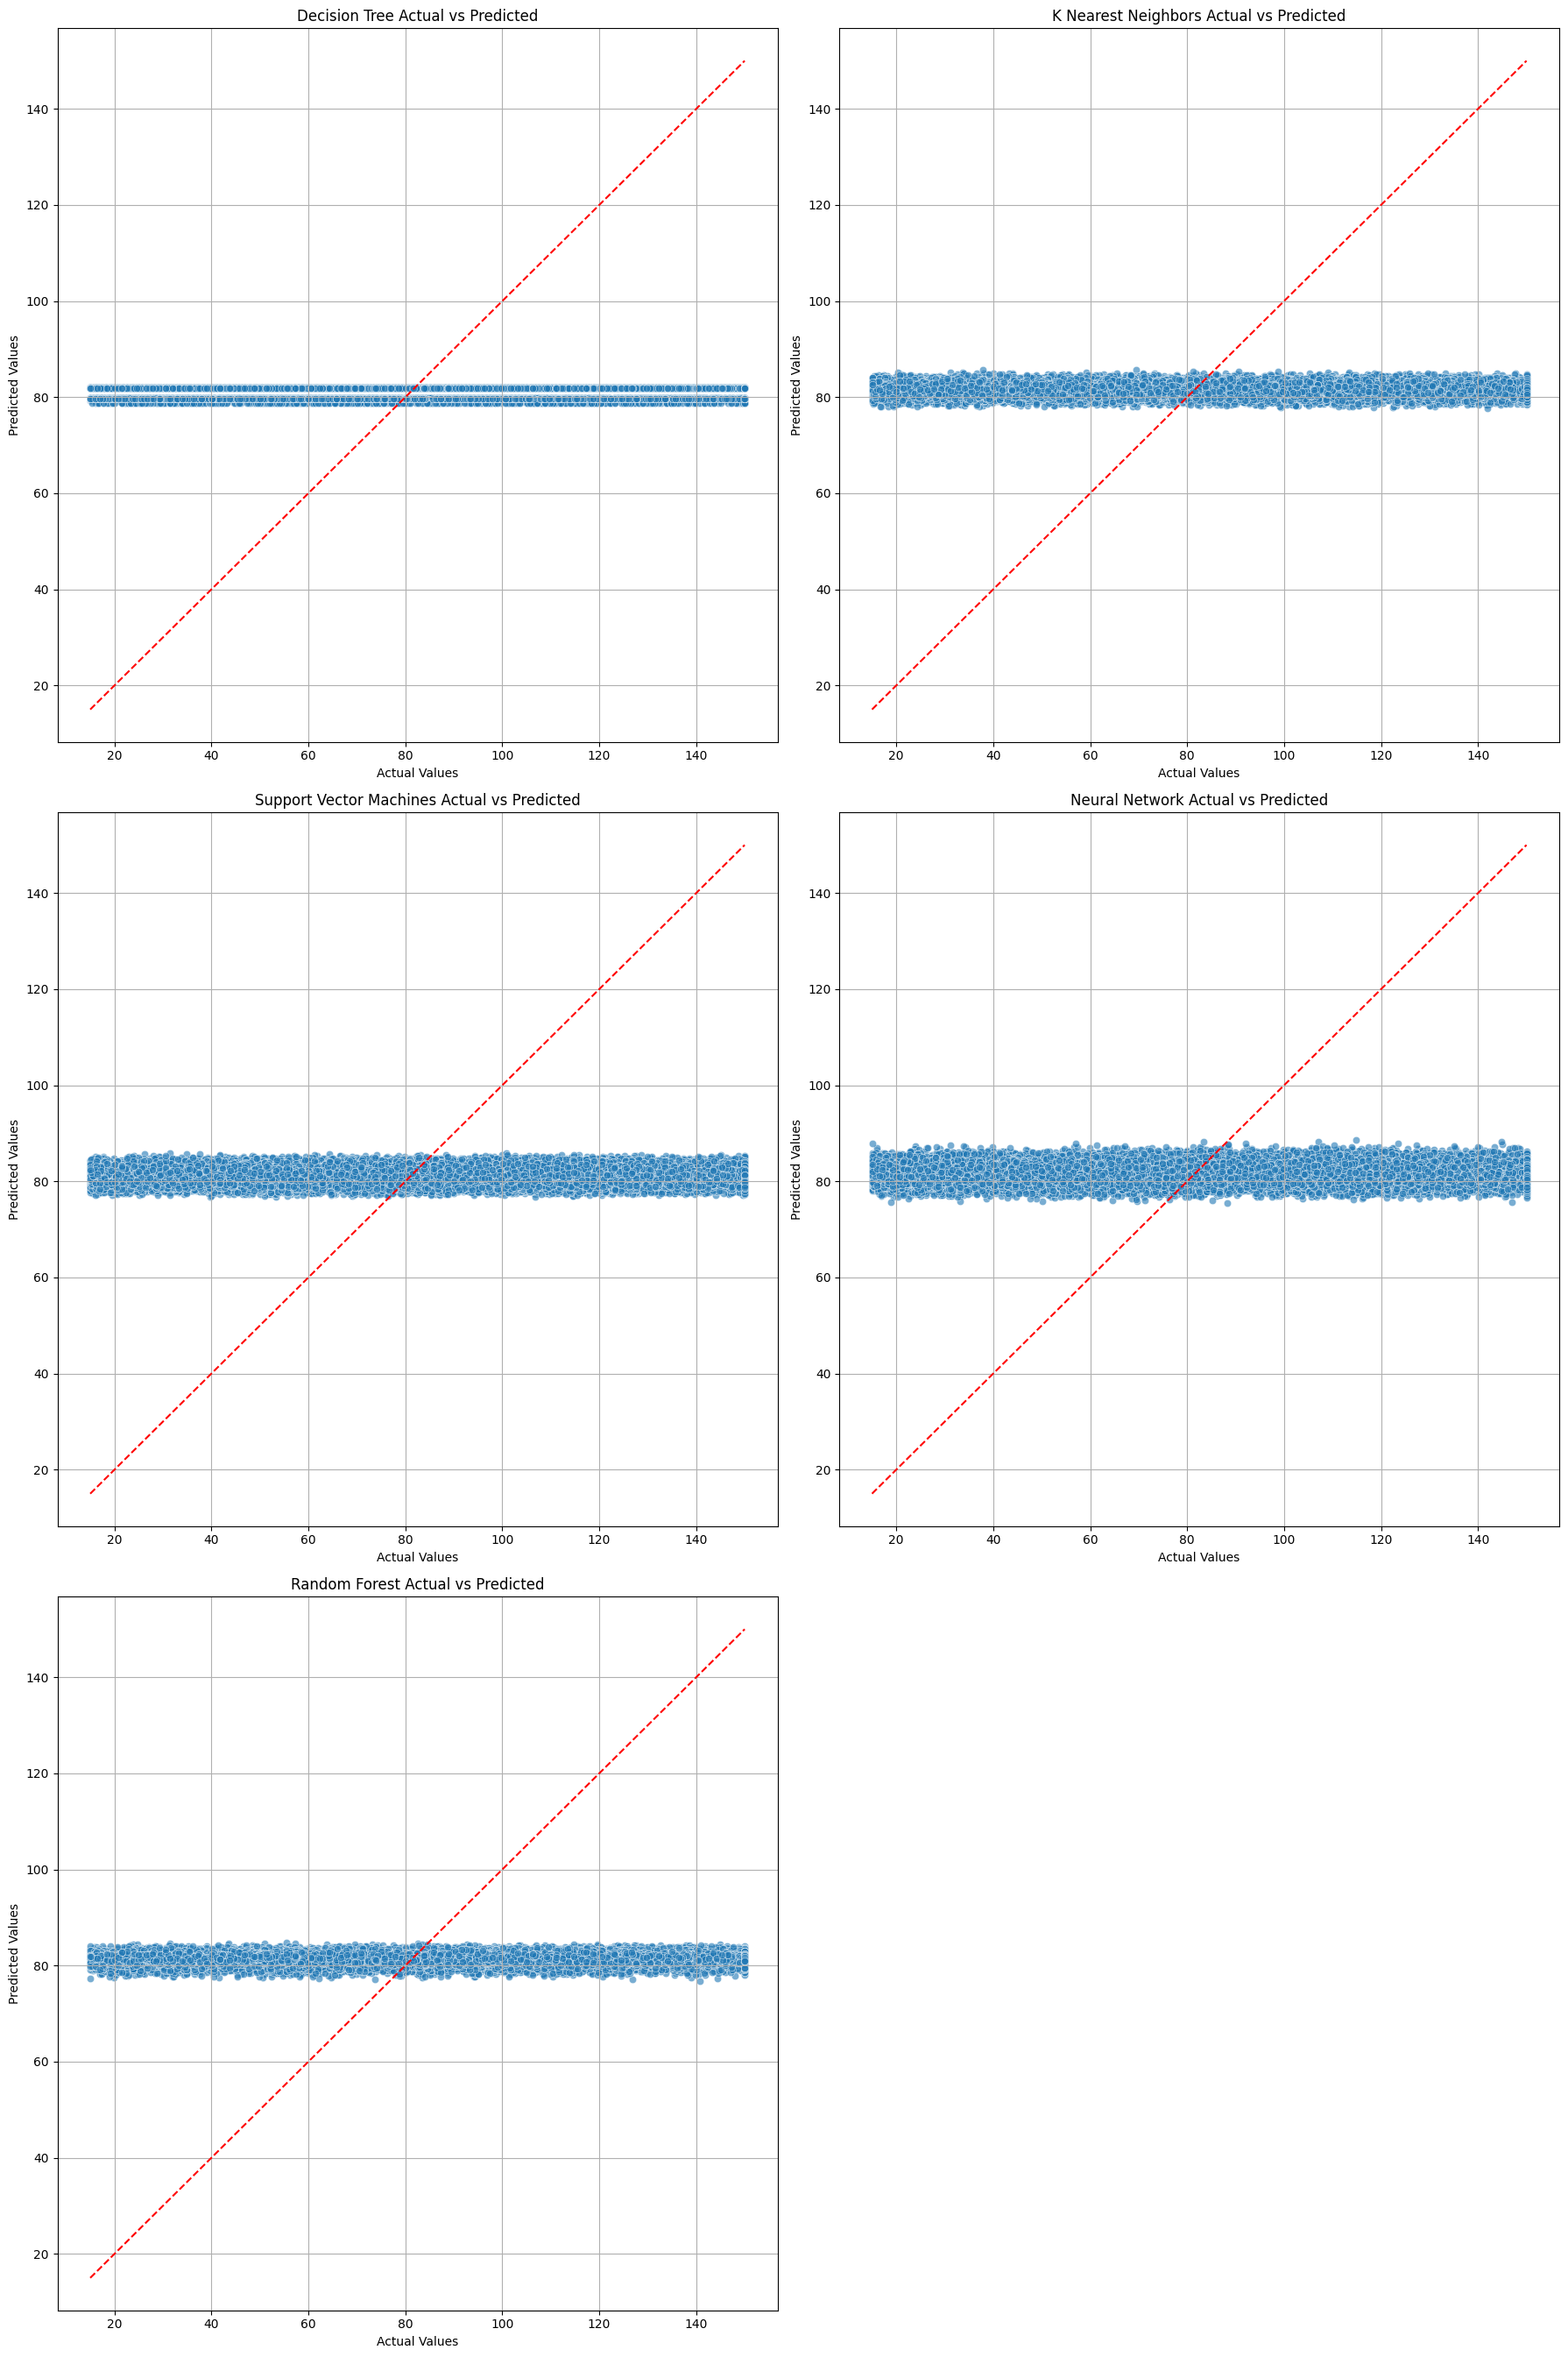

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Layout constants
MODELS = list(residuals.keys())  # Assumes residuals[model_name] = (y_true, y_pred)
PLOTS_PER_ROW = 2
FIGURE_WIDTH = 18
num_models = len(MODELS)
num_rows = math.ceil(num_models / PLOTS_PER_ROW)

# Create subplots
fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW,
                         figsize=(FIGURE_WIDTH, (FIGURE_WIDTH / PLOTS_PER_ROW) * num_rows))
axes = axes.flatten()

# One plot per model
for i, model_name in enumerate(MODELS):
    y_true, y_pred = residuals[model_name]

    sns.scatterplot(x=y_true, y=y_pred, ax=axes[i], alpha=0.6)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--')  # y = x reference line

    axes[i].set_title(f"{model_name} Actual vs Predicted")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")
    axes[i].grid(True)

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

By analyzing the Actual vs. Predicted plots generated during cross-validation, it becomes evident that all models tend to predict target values clustered around a narrow band near the mean price (approximately 80). This indicates that the predictions are largely unrelated to the input features, further suggesting that the models are unable to learn meaningful relationships from the provided features.

Despite this overall limitation, the Random Forest model shows a thinner stripe in its actual vs. predicted plot, which might point to better sensitivity to variation in the data. However, the difference is subtle and does not overcome the previous analysis.

### 📉 Residual Plots

This set of residual plots provides a view of the prediction errors for each model. For every model, the residuals (i.e., the difference between actual and predicted values) are plotted against the predicted values.
A well-behaved residual plot should  show no clear patterns and should be centered around zero, indicated by the red dashed horizontal line.

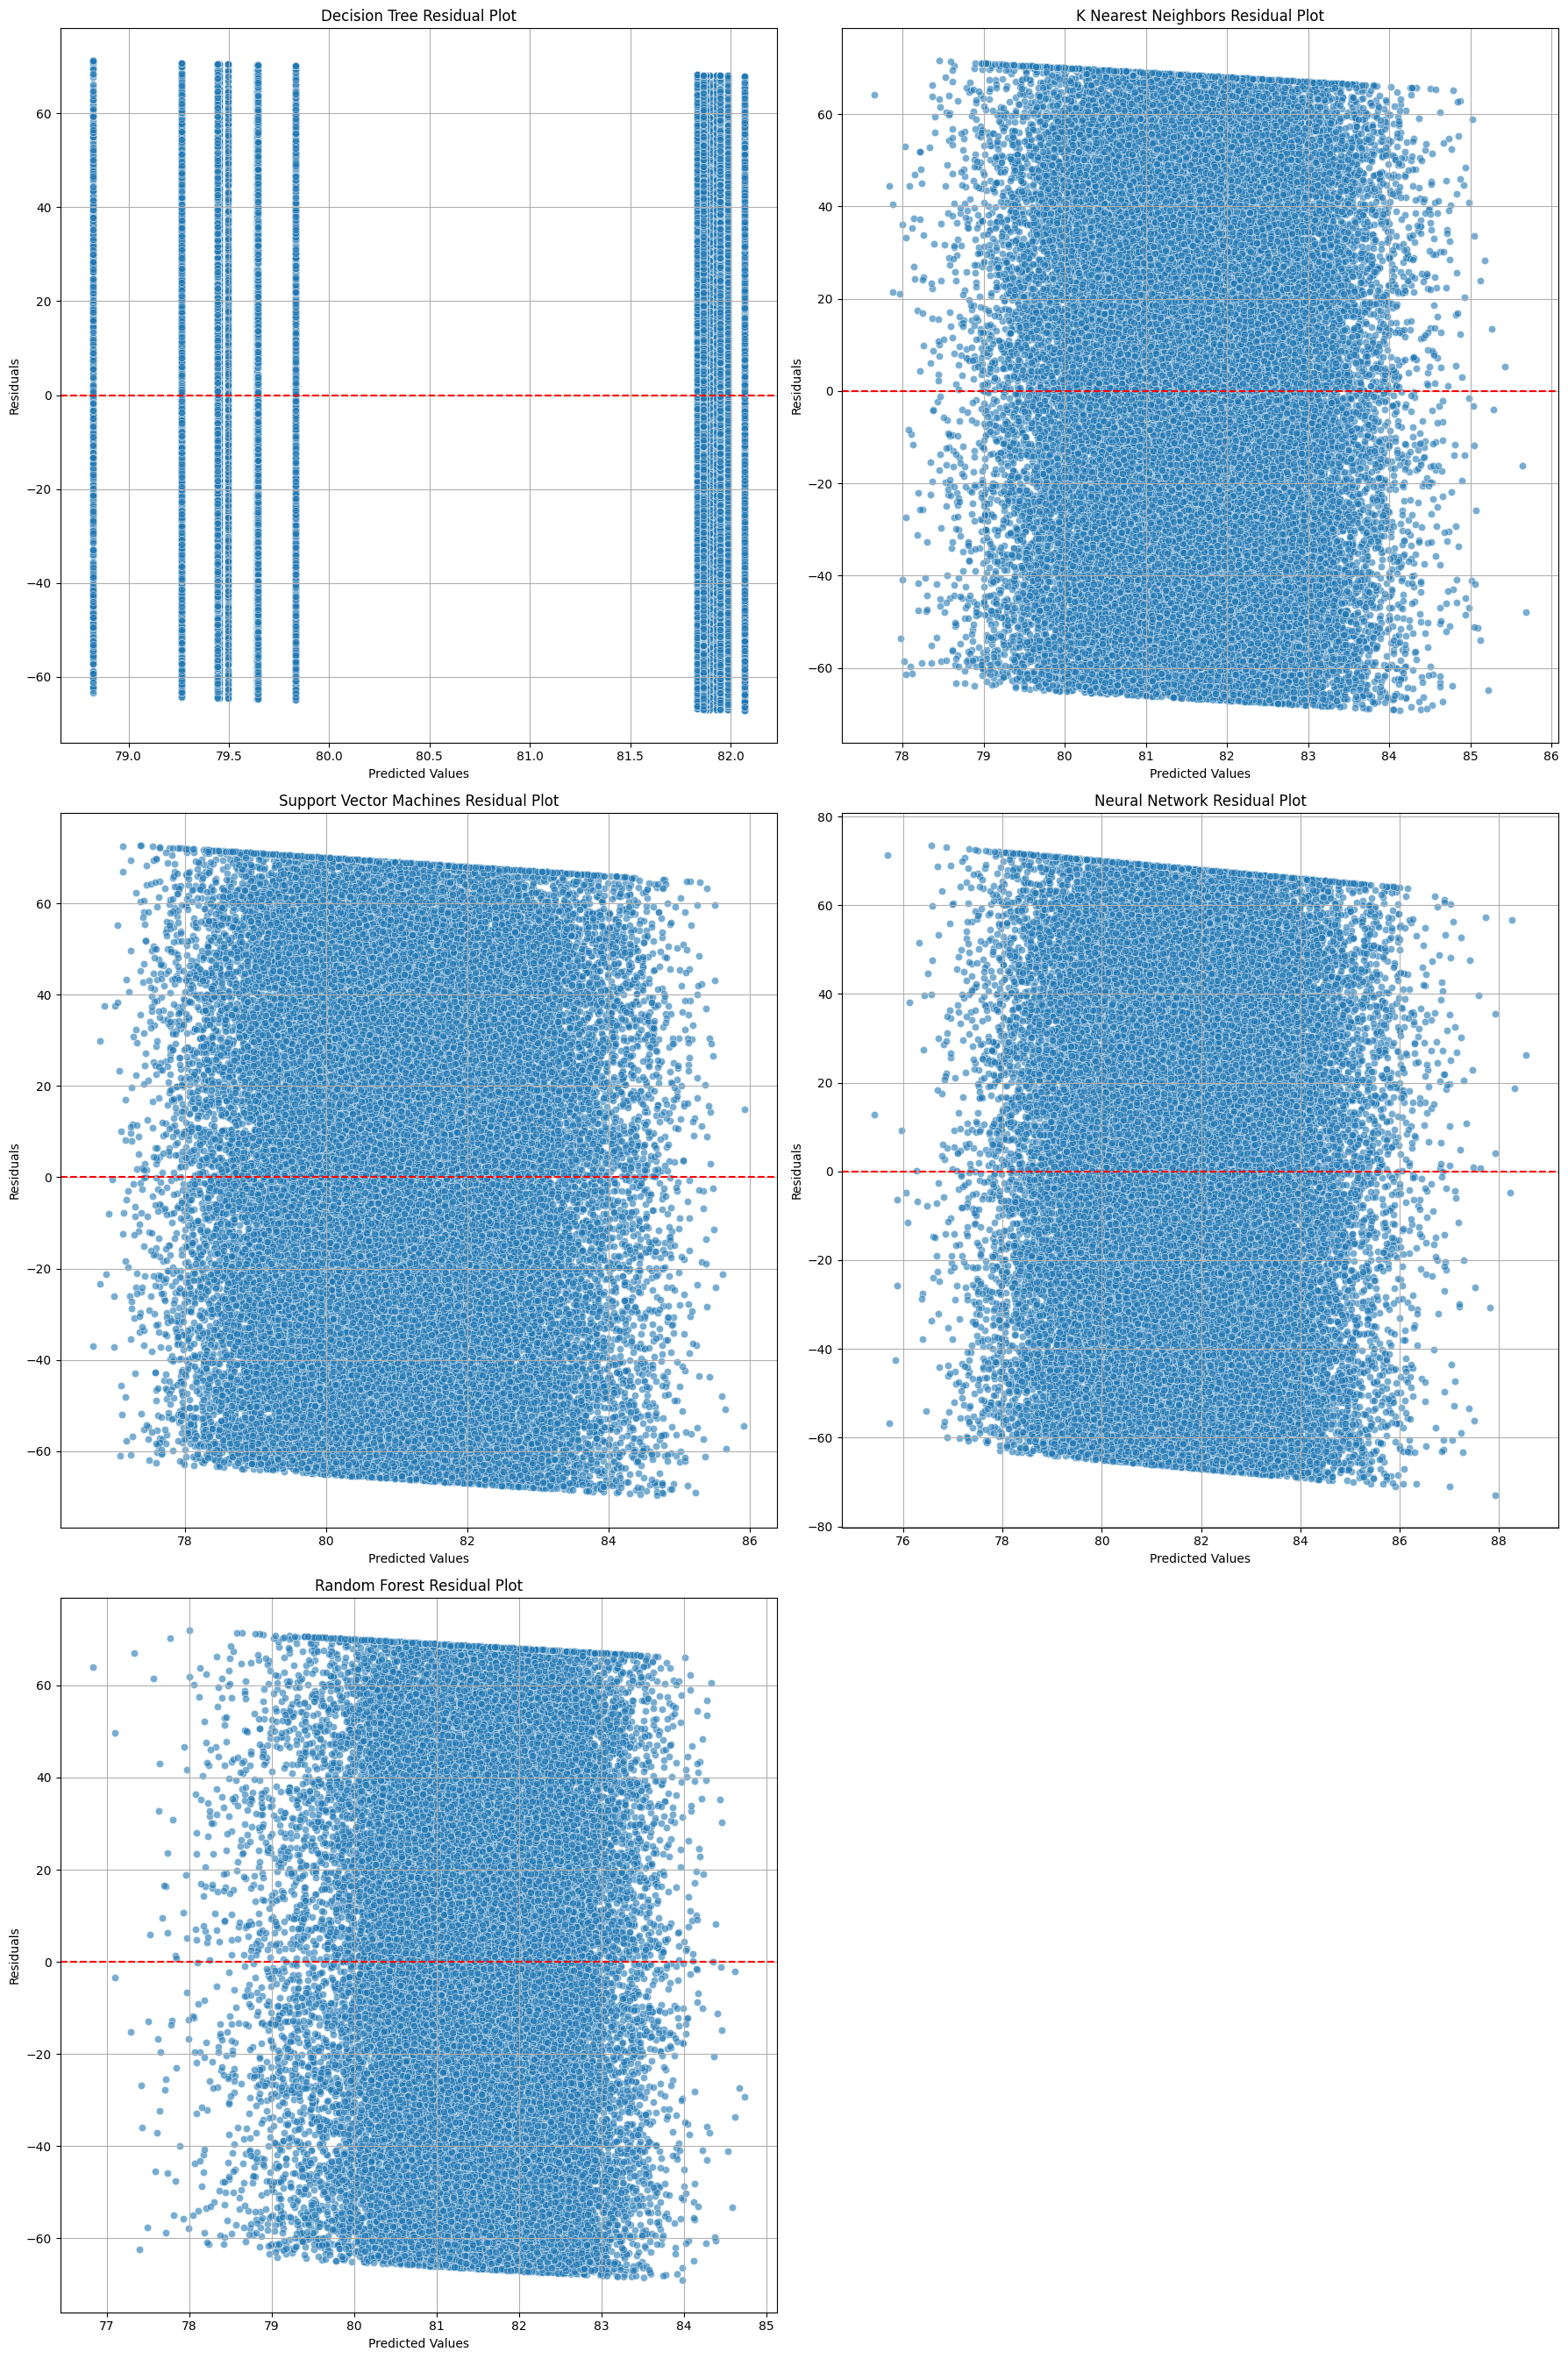

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Layout constants
MODELS = list(residuals.keys())
PLOTS_PER_ROW = 2
FIGURE_WIDTH = 18
num_models = len(MODELS)
num_rows = math.ceil(num_models / PLOTS_PER_ROW)

# Create subplots
fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW,
                         figsize=(FIGURE_WIDTH, (FIGURE_WIDTH / PLOTS_PER_ROW) * num_rows))
axes = axes.flatten()

# One plot per model
for i, model_name in enumerate(MODELS):
    y_true, y_pred = residuals[model_name]
    res = np.array(y_true) - np.array(y_pred)

    sns.scatterplot(x=y_pred, y=res, ax=axes[i], alpha=0.6)
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f"{model_name} Residual Plot")
    axes[i].set_xlabel("Predicted Values")
    axes[i].set_ylabel("Residuals")
    axes[i].grid(True)

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

For most models, the residuals form a dispersed cloud that spans the full vertical range of the plot, indicating that prediction errors are widely spread across all predicted values. This kind of uniform dispersion is generally a positive sign, as it suggests that the errors are not systematically related to the predicted values—meaning the models do not show clear bias across different ranges of outputs.

An exception to the cloud-like residual pattern is observed with the Decision Tree model, where the residuals appear in distinct vertical stripes. This pattern reflects the nature of decision trees: they produce discrete prediction values rather than continuous ones, leading to clusters of predictions that correspond to specific leaf nodes. The result is a residual plot where many different actual values are associated with the same prediction, hence the vertical lines.

Overall, this also reveals that residuals frequently reach very large magnitudes, up to about ±80, which is significant compared to the average backpack price (~80). This highlights that while the model predictions are unbiased overall, which aligns with the previous conclusion that the models are predicting prices independently from the features.

### 〰️ Learning Curve

This plot shows the learning curve for each model, illustrating how their performance evolves as the size of the training data increases.
Learning curves plot the training and validation errors against different training set sizes, and help identify whether a model is underfitting (high error on both training and validation) or overfitting (low training error but high validation error).

[learning_curve] Training set sizes: [ 4800  9600 14400 19200 24000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    2.0s remaining:    1.8s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[learning_curve] Training se

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] END .................................................... total time=   5.4s
[CV] END .................................................... total time=   5.2s
[CV] END .................................................... total time=   5.7s
[CV] END .................................................... total time=   6.6s
[CV] END .................................................... total time=   6.9s
[CV] END .................................................... total time=   8.6s
[CV] END .................................................... total time=   9.3s
[CV] END .................................................... total time=   8.7s
[CV] END .................................................... total time=   9.5s
[CV] END .................................................... total time=  10.2s
[CV] END .................................................... total time=  11.2s
[CV] END .................................................... total time=  11.8s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   34.1s remaining:   31.4s


[CV] END .................................................... total time=  11.6s
[CV] END .................................................... total time=  12.3s
[CV] END .................................................... total time=  13.5s
[CV] END .................................................... total time=  15.3s
[CV] END .................................................... total time=  13.1s
[CV] END .................................................... total time=  14.0s
[CV] END .................................................... total time=  13.3s
[CV] END .................................................... total time=  15.4s
[CV] END .................................................... total time=  15.3s
[CV] END .................................................... total time=  16.6s
[CV] END .................................................... total time=  15.5s
[CV] END .................................................... total time=  15.5s
[learning_curve] Training se

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   7.9s
[CV] END .................................................... total time=   8.4s
[CV] END .................................................... total time=   8.6s
[CV] END .................................................... total time=   8.7s
[CV] END .................................................... total time=  11.3s
[CV] END .................................................... total time=  17.2s
[CV] END .................................................... total time=  20.6s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   29.6s remaining:   27.3s


[CV] END .................................................... total time=  21.0s
[CV] END .................................................... total time=  22.6s
[CV] END .................................................... total time=  25.9s
[CV] END .................................................... total time=  28.9s
[CV] END .................................................... total time=  28.3s
[CV] END .................................................... total time=  27.9s
[CV] END .................................................... total time=  32.9s
[CV] END .................................................... total time=  37.8s
[CV] END .................................................... total time=  38.0s
[CV] END .................................................... total time=  36.7s
[CV] END .................................................... total time=  45.5s
[CV] END .................................................... total time=  45.4s
[learning_curve] Training se

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   57.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.7s


/home/brunol/iart/proj2/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.2s


/home/brunol/iart/proj2/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    3.4s remaining:    3.1s


[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.7s
[CV] END .................................................... total time=   3.6s


/home/brunol/iart/proj2/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/brunol/iart/proj2/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   4.3s
[learning_curve] Training set sizes: [ 4800  9600 14400 19200 24000]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.4s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.7s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    2.1s remaining:    1.9s


[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   2.0s
[CV] END .................................................... total time=   2.0s
[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.0s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


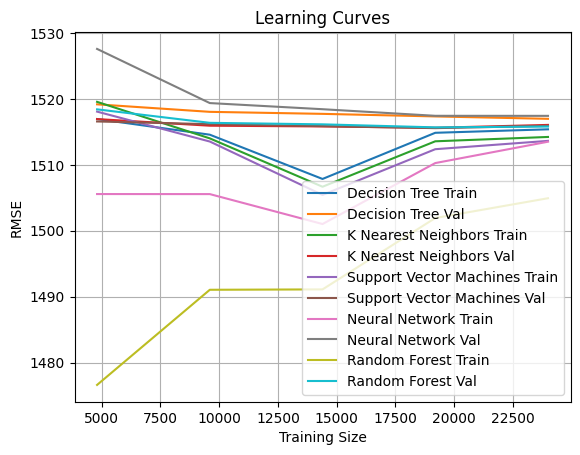

In [27]:
from sklearn.model_selection import learning_curve

for name, model in models.items():
    learn_X = X.sample(n=30000, random_state=1)
    learn_y = y.loc[learn_X.index]

    train_sizes, train_scores, val_scores = learning_curve(
        model, learn_X, learn_y,
        cv=5,
        scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.2, 1.0, 5),
        n_jobs=-1,
        verbose=2
    )

    plt.plot(train_sizes, -train_scores.mean(axis=1), label=f"{name} Train")
    plt.plot(train_sizes, -val_scores.mean(axis=1), label=f"{name} Val")

plt.title("Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

The learning curves reveal that all models exhibit a slight reduction in RMSE as the training set size increases, though the improvements diminish progressively with larger datasets.

___

## 🔮 Predictions

To conclude the modelling process, the best-performing model is selected based on the Root Mean Squared Error (RMSE) metric. Among the trained models, the one with the lowest RMSE is selected to predict the price of the items in the `test.csv` dataset.

In [28]:
import pandas as pd

def select_and_run_best_model(models, results, X_train, y_train, X_test, test_data):
    best_model_name = results['RMSE'].idxmin()
    best_model = models[best_model_name]

    print(f"Best model: {best_model_name}")

    best_model.set_params(n_jobs=-1)
    with parallel_backend('multiprocessing'):
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    print(f"Predictions: {y_pred[:5]}")

    test_data['Price'] = y_pred

    return test_data

train_data = pd.read_csv(dataset_extra)
handle_missing(train_data, inpute=True)
encode_data(train_data)
normalize_data(train_data)

X_train = train_data[final_columns]
y_train = train_data['Price']

test_data = pd.read_csv(dataset_test)

handle_missing(test_data, inpute=True)
encode_data(test_data)
normalize_data(test_data)

X_test = test_data[final_columns]

predicted_data = select_and_run_best_model(models, results, X_train, y_train, X_test, test_data)

print(predicted_data.shape)

Best model: Random Forest
Predictions: [81.39865835 82.30005433 81.72014785 81.42262821 79.31293927]
(200000, 34)


Finally, a CSV is generated containing the `id` and `price` of every item, formatted according to the submission requirements of the Kaggle competition.
The resulting file, `submission.csv`, is ready to be uploaded for evaluation on the Kaggle platform.

In [29]:
submission_file = "submission.csv"
predicted_data[['id', 'Price']].to_csv(submission_file, index=False)
print(f"Submission file created: {submission_file}")

Submission file created: submission.csv


---

## 🏁 Conclusion

In this project, we explored the application of supervised techniques applied to regression problems to predict the prices of student backpacks based on the Kaggle Playground Competition Season 5 Episode 2.

We followed the common machine learning pipeline starting with the Exploratory Data Analysis, which allowed us to get an overview of the dataset we were working with. Based on some observations from the previous step, we performed a Data Preprocessing step to improve the quality of the dataset, specified the target variable and defined methods to tune the parameters of each model.

As for the models implemented, we went with Decision Tree, K-Nearest Neighbors, Support Vector Machines, Neural Networks and Random Forests. All of the models were tuned, trained and compared based on chosen metrics (RMSE, MAE and R² Score) as well as Training and Testing times. Based on this, we ranked the models based on suitability for this problem (considering both results and execution times) in following manner: Decision Tree → KNN → SVM → Neural Networks → Random Forest.

Despite this, we observed that all of our models had very bad results, usually making predictions centered around the average value despite the actual features of the data they were using. We conclude that this has to do with the dataset itself, since it was generated using artificial intelligence and all the columns have uniform distributions without significant correlations that allow the models to accurate predictions.

For the final part of our project, we used the best model from the ones that were trained and predicted the target variable (price) of the data in the test.csv dataset. This was the data that was used to test the models of the Kaggle competition, so we exported the results and uploaded our solution to Kaggle, having achieved a score of 38,94 placing us just over 2000th place. Nonetheless, the top results were not far from the ones obtained, further indicating that the main issue was the training dataset in question.